In [1]:
import random

In [2]:
# Fitness function - calculates the fitness of a given chromosome
def fitness(chromosome, budget):
    total_cost = sum(chromosome.values())
    return (budget - total_cost) / budget

##### test

In [149]:
chromosome

{'Shopping': 30,
 'Food & Drink': 245,
 'Life & Entertainment': 67,
 'Vehicle': 129,
 'Housing': 39,
 'Education': 118}

In [185]:
fitness_score = []
for chromosome in population:
    # print(sum(chromosome.values()))
    fitness_score.append(budget - sum(chromosome.values())/ budget)

fitness_score

[1499.896,
 1499.7786666666666,
 1499.7686666666666,
 1499.7493333333334,
 1499.7466666666667,
 1499.744,
 1499.7333333333333,
 1499.728,
 1499.7206666666666,
 1499.7206666666666,
 1499.7206666666666,
 1499.7206666666666,
 1499.7206666666666,
 1499.702,
 1499.694,
 1499.6893333333333,
 1499.68,
 1499.6773333333333,
 1499.6713333333332,
 1499.6593333333333,
 1499.6486666666667,
 1499.6153333333334,
 1499.6146666666666,
 1499.6033333333332,
 1499.6,
 1499.5906666666667,
 1499.588,
 1499.586,
 1499.584,
 1499.5813333333333,
 1499.58,
 1499.5753333333334,
 1499.574,
 1499.572,
 1499.5633333333333,
 1499.5613333333333,
 1499.558,
 1499.5566666666666,
 1499.552,
 1499.5506666666668,
 1499.526,
 1499.5233333333333,
 1499.5166666666667,
 1499.516,
 1499.51,
 1499.51,
 1499.5093333333334,
 1499.5033333333333,
 1499.494,
 1499.488,
 1499.4853333333333,
 1499.4826666666668,
 1499.4826666666668,
 1499.4813333333334,
 1499.476,
 1499.4746666666667,
 1499.4693333333332,
 1499.4613333333334,
 1499.45

In [3]:
# Selection function - selects two chromosomes from the population based on their fitness
def selection(population, budget):
    fitness_values = [fitness(chromosome, budget) for chromosome in population] 
    sum_fitness = sum(fitness_values)
    selection_probabilities = [fitness_value/sum_fitness for fitness_value in fitness_values]
    index1 = random.choices(range(len(population)), weights=selection_probabilities)[0]
    index2 = random.choices(range(len(population)), weights=selection_probabilities)[0]
    return population[index1], population[index2]

##### test

In [69]:
fitness_values = [fitness(chromosome, budget) for chromosome in population] 
fitness_values

[0.6375,
 0.4635,
 0.6425,
 0.614,
 0.6205,
 0.5725,
 0.558,
 0.4015,
 0.56,
 0.6685,
 0.5885,
 0.679,
 0.5895,
 0.4165,
 0.611,
 0.5505,
 0.584,
 0.5155,
 0.607,
 0.7115,
 0.664,
 0.427,
 0.573,
 0.455,
 0.4355,
 0.685,
 0.483,
 0.4765,
 0.7,
 0.4875,
 0.36,
 0.616,
 0.808,
 0.4815,
 0.5005,
 0.562,
 0.711,
 0.6445,
 0.6725,
 0.688,
 0.4865,
 0.767,
 0.671,
 0.81,
 0.834,
 0.693,
 0.5865,
 0.4275,
 0.4745,
 0.5545,
 0.552,
 0.563,
 0.383,
 0.6675,
 0.637,
 0.612,
 0.606,
 0.796,
 0.4935,
 0.6325,
 0.3115,
 0.5135,
 0.76,
 0.812,
 0.5685,
 0.5845,
 0.4915,
 0.6275,
 0.43,
 0.7765,
 0.4665,
 0.602,
 0.336,
 0.8265,
 0.632,
 0.336,
 0.8,
 0.691,
 0.6815,
 0.663,
 0.922,
 0.6805,
 0.7705,
 0.7365,
 0.596,
 0.6895,
 0.502,
 0.5035,
 0.589,
 0.6325,
 0.7025,
 0.544,
 0.612,
 0.563,
 0.758,
 0.465,
 0.7445,
 0.5665,
 0.7535,
 0.686]

In [59]:
sum(fitness_values)

60.19599999999999

In [191]:
selection_probabilities = [fitness_value/sum(fitness_values) for fitness_value in fitness_values]
selection_probabilities

[0.0105904046780517,
 0.007699847165924647,
 0.010673466675526613,
 0.010200013289919598,
 0.010307993886636987,
 0.009510598710877801,
 0.009269718918200547,
 0.006669878397235698,
 0.009302943717190513,
 0.011105389062396174,
 0.00977639710279753,
 0.011279819257093497,
 0.009793009502292513,
 0.006919064389660444,
 0.010150176091434648,
 0.009145125921988174,
 0.009701641305070105,
 0.008563691939663765,
 0.010083726493454716,
 0.011819722240680446,
 0.01103063326466875,
 0.007093494584357766,
 0.009518904910625292,
 0.0075586417702172915,
 0.007234699980065122,
 0.011379493654063396,
 0.008023788956076817,
 0.007915808359359428,
 0.01162867964648814,
 0.00809854475380424,
 0.005980463818193901,
 0.010233238088909564,
 0.013422818791946312,
 0.007998870356834342,
 0.00831450594723902,
 0.00933616851618048,
 0.011811416040932953,
 0.01070669147451658,
 0.011171838660376106,
 0.011429330852548342,
 0.008081932354309257,
 0.012741710412652006,
 0.011146920061133632,
 0.0134560435909362

In [68]:
index1 = random.choices(range(len(population)), weights=selection_probabilities)[0]
random.choices(range(len(population)), weights=selection_probabilities)[0]

45

In [4]:
# Crossover function - performs a single-point crossover on two chromosomes
def crossover(chromosome1, chromosome2):
    crossover_point = random.randint(0, len(chromosome1)-1) # can choose between 0-5(untuk point yang mana nak crossover)
    new_chromosome1 = { key: (chromosome1[key] if index <= crossover_point else chromosome2[key]) for index, key in enumerate(chromosome1)} # tukar value dict pada point dengan parent2
    new_chromosome2 = { key: (chromosome2[key] if index <= crossover_point else chromosome1[key]) for index, key in enumerate(chromosome2)} # tukar value dict pada point dengan parent1
    return new_chromosome1, new_chromosome2

##### test

In [190]:
population = [{ 'Shopping': random.randint(0, 150), 'Food & Drink': random.randint(0, 250), 'Life & Entertainment': random.randint(0, 150), 'Vehicle': random.randint(0, 200), 'Housing': random.randint(0, 700), 'Education':random.randint(0,150)} for i in range(population_size)]

parent1, parent2 = selection(population, budget)

parent1

{'Shopping': 126,
 'Food & Drink': 47,
 'Life & Entertainment': 90,
 'Vehicle': 17,
 'Housing': 149,
 'Education': 11}

In [39]:
parent2

{'Shopping': 59,
 'Food & Drink': 108,
 'Life & Entertainment': 10,
 'Vehicle': 67,
 'Housing': 106,
 'Education': 50}

In [81]:
crossover_point = random.randint(0, len(parent1)-1)  # can choose between 0-5(untuk point yang mana nak crossover)
new_chromosome1 = { key: (parent1[key] if index <= crossover_point else parent2[key]) for index, key in enumerate(parent1)}
new_chromosome2 = { key: (parent2[key] if index <= crossover_point else parent1[key]) for index, key in enumerate(parent2)} # tukar value dict pada point dengan parent1
new_chromosome2

{'Shopping': 59,
 'Food & Drink': 108,
 'Life & Entertainment': 10,
 'Vehicle': 67,
 'Housing': 106,
 'Education': 50}

In [5]:
# Mutation function - mutates a single gene in the chromosome
def mutation(chromosome, mutation_rate):
    for key in chromosome:
        if random.random() < mutation_rate:
            chromosome[key] += random.randint(-10, 10)
    return chromosome

##### test

In [85]:
for key in new_chromosome1:
    if random.random() < mutation_rate:
        new_chromosome1[key] += random.randint(-10,10)

In [128]:
# Main function - runs the genetic algorithm
def genetic_algorithm(budget, population_size, generations, mutation_rate):
    # Generate initial population
    population = [{ 'Shopping': random.randint(0, 150), 'Food & Drink': random.randint(250, 300), 'Life & Entertainment': random.randint(100, 150), 'Vehicle': random.randint(200, 400), 'Housing': random.randint(250, 350), 'Education':random.randint(0,150)} for i in range(population_size)]
    best_chromosome = None
    for i in range(generations):
        # Select two parents from the population
        parent1, parent2 = selection(population, budget)
        # Create two children from the parents
        child1, child2 = crossover(parent1, parent2)
        # Mutate the children
        child1 = mutation(child1, mutation_rate)
        child2 = mutation(child2, mutation_rate)
        # Add the children to the population
        population.extend([child1, child2])
        # Keep only the best chromosomes in the population
        population = sorted(population, key=lambda x: fitness(x, budget), reverse=True)[:population_size]
        # Update the best chromosome if necessary
        if best_chromosome is None or fitness(best_chromosome, budget) < fitness(population[0], budget):
            best_chromosome = population[0]
        # Print the best chromosome and its fitness
        print(f"Generation {i+1}: Best chromosome = {best_chromosome}, Fitness = {fitness(best_chromosome, budget)}")
    return best_chromosome

In [115]:
population.extend([new_chromosome1, new_chromosome2])
population

[{'Shopping': 4,
  'Food & Drink': 25,
  'Life & Entertainment': 25,
  'Vehicle': 70,
  'Housing': 21,
  'Education': 11},
 {'Shopping': 57,
  'Food & Drink': 23,
  'Life & Entertainment': 138,
  'Vehicle': 17,
  'Housing': 61,
  'Education': 36},
 {'Shopping': 137,
  'Food & Drink': 9,
  'Life & Entertainment': 83,
  'Vehicle': 55,
  'Housing': 35,
  'Education': 28},
 {'Shopping': 146,
  'Food & Drink': 18,
  'Life & Entertainment': 55,
  'Vehicle': 2,
  'Housing': 151,
  'Education': 4},
 {'Shopping': 13,
  'Food & Drink': 7,
  'Life & Entertainment': 112,
  'Vehicle': 3,
  'Housing': 105,
  'Education': 140},
 {'Shopping': 1,
  'Food & Drink': 136,
  'Life & Entertainment': 42,
  'Vehicle': 122,
  'Housing': 16,
  'Education': 67},
 {'Shopping': 59,
  'Food & Drink': 108,
  'Life & Entertainment': 10,
  'Vehicle': 67,
  'Housing': 106,
  'Education': 50},
 {'Shopping': 97,
  'Food & Drink': 84,
  'Life & Entertainment': 18,
  'Vehicle': 124,
  'Housing': 51,
  'Education': 34},
 {'

In [116]:
# Keep only the best chromosomes in the population
population = sorted(population, key=lambda x: fitness(x, budget), reverse=True)[:population_size]

In [129]:
best_chromosome = None
if best_chromosome is None or fitness(best_chromosome, budget) < fitness(population[0], budget):
    best_chromosome = population[0]
    print(best_chromosome)

{'Shopping': 4, 'Food & Drink': 25, 'Life & Entertainment': 25, 'Vehicle': 70, 'Housing': 21, 'Education': 11}


In [146]:
# Example usage
budget = 1500
population_size = 100
generations = 100
mutation_rate = 0.1
best_chromosome = genetic_algorithm(budget, population_size, generations, mutation_rate)
print(f"Best chromosome: {best_chromosome}, Fitness: {fitness(best_chromosome, budget)}")

Generation 1: Best chromosome = {'Shopping': 3, 'Food & Drink': 259, 'Life & Entertainment': 113, 'Vehicle': 289, 'Housing': 258, 'Education': 6}, Fitness = 0.38133333333333336
Generation 2: Best chromosome = {'Shopping': 3, 'Food & Drink': 259, 'Life & Entertainment': 113, 'Vehicle': 289, 'Housing': 258, 'Education': 6}, Fitness = 0.38133333333333336
Generation 3: Best chromosome = {'Shopping': 3, 'Food & Drink': 259, 'Life & Entertainment': 113, 'Vehicle': 289, 'Housing': 258, 'Education': 6}, Fitness = 0.38133333333333336
Generation 4: Best chromosome = {'Shopping': 3, 'Food & Drink': 259, 'Life & Entertainment': 113, 'Vehicle': 289, 'Housing': 258, 'Education': 6}, Fitness = 0.38133333333333336
Generation 5: Best chromosome = {'Shopping': 3, 'Food & Drink': 259, 'Life & Entertainment': 113, 'Vehicle': 289, 'Housing': 258, 'Education': 6}, Fitness = 0.38133333333333336
Generation 6: Best chromosome = {'Shopping': 3, 'Food & Drink': 259, 'Life & Entertainment': 113, 'Vehicle': 289, '

In [150]:
balance = budget - sum(best_chromosome.values())
balance

620

In [165]:
generations

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100]

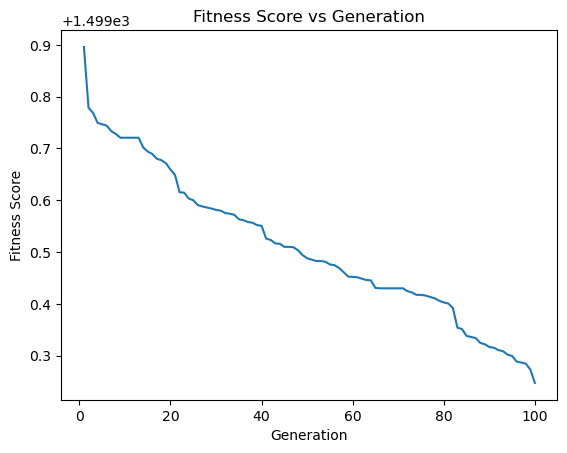

In [188]:
import matplotlib.pyplot as plt

# generations = list(range(1, 101))
# fitness_scores = [-0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0]  # Replace with actual fitness scores

plt.plot(generations, fitness_score)
plt.xlabel("Generation")
plt.ylabel("Fitness Score")
plt.title("Fitness Score vs Generation")
plt.show()

In [166]:
fitness(best_chromosome, budget)

0.41333333333333333

In [189]:
fitness_score

[1499.896,
 1499.7786666666666,
 1499.7686666666666,
 1499.7493333333334,
 1499.7466666666667,
 1499.744,
 1499.7333333333333,
 1499.728,
 1499.7206666666666,
 1499.7206666666666,
 1499.7206666666666,
 1499.7206666666666,
 1499.7206666666666,
 1499.702,
 1499.694,
 1499.6893333333333,
 1499.68,
 1499.6773333333333,
 1499.6713333333332,
 1499.6593333333333,
 1499.6486666666667,
 1499.6153333333334,
 1499.6146666666666,
 1499.6033333333332,
 1499.6,
 1499.5906666666667,
 1499.588,
 1499.586,
 1499.584,
 1499.5813333333333,
 1499.58,
 1499.5753333333334,
 1499.574,
 1499.572,
 1499.5633333333333,
 1499.5613333333333,
 1499.558,
 1499.5566666666666,
 1499.552,
 1499.5506666666668,
 1499.526,
 1499.5233333333333,
 1499.5166666666667,
 1499.516,
 1499.51,
 1499.51,
 1499.5093333333334,
 1499.5033333333333,
 1499.494,
 1499.488,
 1499.4853333333333,
 1499.4826666666668,
 1499.4826666666668,
 1499.4813333333334,
 1499.476,
 1499.4746666666667,
 1499.4693333333332,
 1499.4613333333334,
 1499.45